# Assignment 3

In [1]:
#Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

from scipy import stats
import statsmodels.api as sm

### Import Data

In [2]:
#Import Portfolio Data
port_data_complete = pd.read_csv('25_Portfolios_5x5.csv', skiprows = list(range(0,15)), dtype = np.float64, nrows = 1107)
#Convert Date
port_data_complete['Date'] = pd.to_datetime(port_data_complete['Unnamed: 0'], format = '%Y%m.0')
#Set Index to Date and delete old Date column
port_data_complete = port_data_complete.set_index('Date')
port_data_complete = port_data_complete.drop('Unnamed: 0', axis = 1)

#Import FF Factors and convert Date and set index to 'Date'
FF_Factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows = [0,1,2], dtype = np.float64, nrows = 1107)
#Convert Date
FF_Factors['Date'] = pd.to_datetime(FF_Factors['Unnamed: 0'], format = '%Y%m.0')
#Set Index to Date and delete old Date column
FF_Factors = FF_Factors.set_index('Date')
FF_Factors = FF_Factors.drop('Unnamed: 0', axis = 1)

#Add The risk free rate and the FF Factors to the dataset
data = pd.concat([port_data_complete, FF_Factors], axis = 1, join = 'inner')

In [3]:
#Calculate Excess Returns
ex_returns_complete = pd.DataFrame()

for i in data.columns[:-4]:
    ex_returns_complete[i] = data[i] - data['RF']

#Add FF Factors, RF 
for i in data.columns[-4:]:
    ex_returns_complete[i] = data[i]

### Exercise 1.1

In [4]:
#Only Use Data from Jan 1963 - Dec 1993
excess_returns_ex1 = ex_returns_complete.loc['1963-01-01':'1993-12-01']
excess_returns_ex1.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,,,,,,,
1963-01-01,12.7652,11.1913,9.4412,10.6091,10.8801,7.3764,5.5634,7.3604,7.9976,10.8621,...,6.5978,5.0045,3.8439,3.2086,6.7185,5.4031,4.93,3.06,2.26,0.25
1963-02-01,-3.4769,-3.7230,-1.0956,-1.0411,2.5540,-4.2490,-2.1193,-2.6279,-1.7649,-0.3176,...,-0.2274,-3.4684,-1.8939,-2.2782,-1.4246,-1.3990,-2.38,0.50,2.21,0.23
1963-03-01,4.7501,-1.7032,-0.8160,1.2184,2.3545,-0.3890,0.9503,1.0122,2.7795,1.0822,...,3.1195,3.4913,2.6020,4.3444,4.9245,4.8249,3.08,-2.62,2.10,0.23
1963-04-01,4.5464,1.2484,2.0266,3.1925,2.5432,2.0807,5.0664,0.3428,3.9201,5.7406,...,4.8882,4.5971,3.8944,5.7291,4.0567,8.1929,4.51,-1.31,1.01,0.25
1963-05-01,3.1528,1.4354,2.5284,3.8397,7.6908,1.8525,2.4919,0.6773,4.5994,4.4280,...,3.4481,2.9448,-0.5712,1.5777,1.4624,5.5326,1.76,1.12,2.50,0.24


In [31]:
mean_exreturns = np.mean(excess_returns_ex1)

SMB


<IPython.core.display.Javascript object>


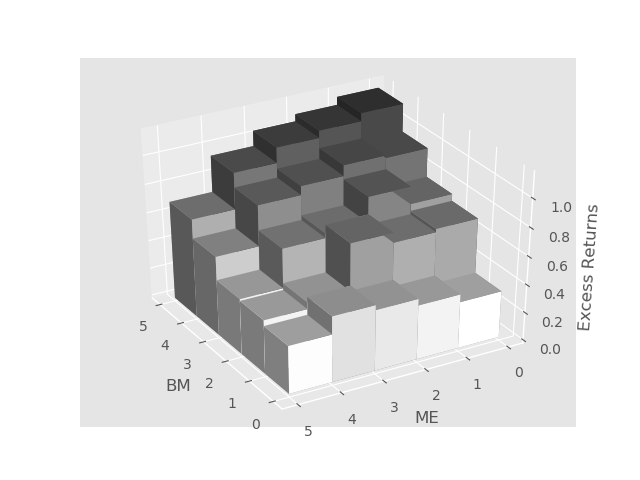

In [30]:
%matplotlib notebook
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.arange(5), np.arange(5))
BM, ME = xx.ravel(), yy.ravel()

dx = np.ones(len(BM))
dy = np.ones(len(ME))
dz = mean_exreturns[:-4].values

#Create Colormap
cmap = cm.get_cmap('binary') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 


ax1.bar3d(BM, ME, np.zeros(len(BM)), dx, dy, dz, color=rgba)

ax1.view_init(35,150)

ax1.set_xlabel('BM')
ax1.set_ylabel('ME')
ax1.set_zlabel('Excess Returns')

plt.show()

### Excersise 1.2

In [7]:
#Create a empty dictionary to store the results; (:-4) to exclude the FF Factors
results_dict = dict.fromkeys(list(excess_returns_ex1.columns[:-4]))

#Loop over all portfolios and regress:
#Excess_Return(Portfolio) = alpha + beta * Excess_Return(Market) + Std_Error
for portfolio_name in excess_returns_ex1.columns[:-4]:
    
    x = excess_returns_ex1['Mkt-RF']
    y = excess_returns_ex1[portfolio_name]
    
    beta, alpha, r_value, p_value, std_err = stats.linregress(x, y)
    
    results_dict[portfolio_name] = [alpha, beta, r_value, std_err**2]
    
results_ex1 = pd.DataFrame(results_dict, index = ['Alpha', 'Beta', 'R2', 'Std Error'])
results_ex1

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Alpha,-0.293545,0.170184,0.260052,0.494935,0.672094,-0.238948,0.155086,0.400355,0.528070,0.608278,...,-0.068812,-0.062854,0.218328,0.419833,0.472634,-0.097496,-0.046748,0.018162,0.189685,0.316787
Beta,1.423392,1.244513,1.149047,1.067264,1.100706,1.425819,1.228351,1.105138,1.032742,1.122175,...,1.225751,1.125530,1.036729,0.972244,1.081440,1.002311,0.978924,0.860066,0.847501,0.862343
R2,0.828762,0.828235,0.836235,0.818639,0.789311,0.889526,0.892000,0.885613,0.879849,0.849059,...,0.945000,0.950058,0.933757,0.902840,0.872881,0.932051,0.951849,0.900501,0.890095,0.804413
Std Error,0.002497,0.001916,0.001535,0.001515,0.001981,0.001450,0.001047,0.000908,0.000841,0.001318,...,0.000486,0.000369,0.000427,0.000579,0.000988,0.000410,0.000269,0.000466,0.000509,0.001096


In [8]:
#Sorts the values and list them in an output table

def create_output_table(coefficient, data):
    #coefficient has be a string
    
    #Create an empty dictionary to store the results in
    output = dict.fromkeys(['Low ME','ME2','ME3','ME4','High ME'])
    
    output['Low ME']  = data.loc[coefficient][0:5].values
    output['ME2']     = data.loc[coefficient][5:10].values
    output['ME3']     = data.loc[coefficient][10:15].values
    output['ME4']     = data.loc[coefficient][15:20].values
    output['High ME'] = data.loc[coefficient][20:25].values
    
    output_table = pd.DataFrame(output, index = ['Low BM', 'BM2', 'BM3', 'BM4', 'High BM']).T
    output_table.index.name = coefficient
    
    return output_table

In [9]:
#Create and print output table for Alpha
alpha = create_output_table('Alpha', results_ex1)
alpha

,Low BM,BM2,BM3,BM4,High BM
Alpha,,,,,
Low ME,-0.293545,0.170184,0.260052,0.494935,0.672094
ME2,-0.238948,0.155086,0.400355,0.528070,0.608278
ME3,-0.162261,0.256785,0.255127,0.479732,0.583655
ME4,-0.068812,-0.062854,0.218328,0.419833,0.472634
High ME,-0.097496,-0.046748,0.018162,0.189685,0.316787


In [10]:
#Create and print output table for Beta
beta = create_output_table('Beta', results_ex1)
beta

,Low BM,BM2,BM3,BM4,High BM
Beta,,,,,
Low ME,1.423392,1.244513,1.149047,1.067264,1.100706
ME2,1.425819,1.228351,1.105138,1.032742,1.122175
ME3,1.357361,1.156318,1.024763,0.975484,1.067429
ME4,1.225751,1.125530,1.036729,0.972244,1.081440
High ME,1.002311,0.978924,0.860066,0.847501,0.862343


In [11]:
#Create and print output table for Beta
R2 = create_output_table('R2', results_ex1)
R2

,Low BM,BM2,BM3,BM4,High BM
R2,,,,,
Low ME,0.828762,0.828235,0.836235,0.818639,0.789311
ME2,0.889526,0.892000,0.885613,0.879849,0.849059
ME3,0.921890,0.925255,0.909140,0.900540,0.855047
ME4,0.945000,0.950058,0.933757,0.902840,0.872881
High ME,0.932051,0.951849,0.900501,0.890095,0.804413


In [12]:
#Create and print output table for Beta
Std_Error = create_output_table('Std Error', results_ex1)
Std_Error

,Low BM,BM2,BM3,BM4,High BM
Std Error,,,,,
Low ME,0.002497,0.001916,0.001535,0.001515,0.001981
ME2,0.001450,0.001047,0.000908,0.000841,0.001318
ME3,0.000880,0.000607,0.000596,0.000599,0.001133
ME4,0.000486,0.000369,0.000427,0.000579,0.000988
High ME,0.000410,0.000269,0.000466,0.000509,0.001096


### Excercise 1.3

In [13]:
#Calculate Expected market return
exp_market_ret = np.mean(excess_returns_ex1['Mkt-RF'])

#Calculate expected portfolio return regarding to CAPM (Expected Market Return * Porfolio Beta)
plot_data = dict.fromkeys(excess_returns_ex1.columns[:-4])

for portfolio_name in excess_returns_ex1.columns[:-4]: 
    
    #Get Portfolio Beta
    port_beta = results_ex1.loc['Beta'][portfolio_name]
    
    #Store the prediction and the actual excess return in the dictionary plot_data
    plot_data[portfolio_name] = [port_beta * exp_market_ret, mean_exreturns[portfolio_name]]

plot_data = pd.DataFrame(plot_data, index = ['CAPM Prediction', 'Actual Excess Return'])

<IPython.core.display.Javascript object>


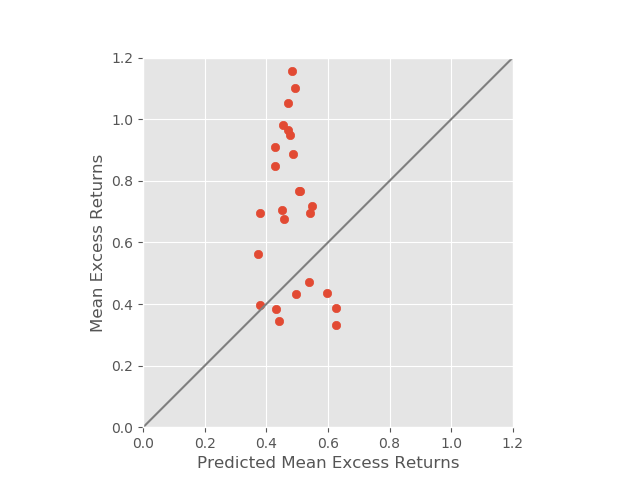

In [29]:
%matplotlib notebook
plt.scatter(plot_data.loc['CAPM Prediction'].values,plot_data.loc['Actual Excess Return'].values)
plt.plot(np.linspace(0,2), np.linspace(0,2), color = 'grey')

axes = plt.gca()
axes.set_xlim([0,1.2])
axes.set_ylim([0,1.2])
plt.gca().set_aspect('equal', adjustable = 'box')

chart_3 = plt.xlabel('Predicted Mean Excess Returns')
chart_3 = plt.ylabel('Mean Excess Returns')

plt.show()

### Excercise 2.1

In [15]:
#Create an empty dict to store the results in
results_ex2 = dict.fromkeys(excess_returns_ex1.columns[:-4])

#Define regression X values
X = np.array([excess_returns_ex1['Mkt-RF'].values] + 
                 [excess_returns_ex1['SMB'].values] + 
                 [excess_returns_ex1['HML'].values]).T 
X = sm.add_constant(X)

#________________________________________________________________________
#For Ex. 2.3 create values for predicting with the fitted model (add constant)
X_pred = np.array([np.mean([excess_returns_ex1['Mkt-RF'].values])] +
                  [np.mean([excess_returns_ex1['SMB'].values])] + 
                  [np.mean([excess_returns_ex1['HML'].values])])
X_pred = np.append(1.0,X_pred)

#________________________________________________________________________
#For Ex. 2.5 prepare out of sample data
excess_returns_ex25 = ex_returns_complete.loc['1994-01-01':'2017-12-01']

#Prepare out of sample predictions(add constant)
X_pred_os = np.array([np.mean([excess_returns_ex25['Mkt-RF'].values])] +
                              [np.mean([excess_returns_ex25['SMB'].values])] + 
                              [np.mean([excess_returns_ex25['HML'].values])])
X_pred_os = np.append(1.0,X_pred_os)

#________________________________________________________________________
#Regress each portfolio on X
for portfolio_name in excess_returns_ex1.columns[:-4]:
    
    Y = np.array(excess_returns_ex1[portfolio_name])

    model = sm.OLS(Y, X)
    results = model.fit()
    
    #Predict Excess Returns for Ex 2.3
    #In Sample
    exret_pred =  results.predict(X_pred)
    #Out of sample
    exret_pred_os = results.predict(X_pred_os)
    
    
    #Store Results in a dictionary
    results_ex2[portfolio_name] = [results.params[0],
                                   results.params[1],
                                   results.params[2],
                                   results.params[3], 
                                   results.bse[0], 
                                   results.rsquared, 
                                   exret_pred[0],
                                   exret_pred_os[0]]
    

In [16]:
#Convert the result dict into a dataframe
results_ex2 = pd.DataFrame(results_ex2, index = ['Alpha',
                                                 'Mkt-RF',
                                                 'SMB','HML', 
                                                 'Std Error Aplha', 
                                                 'R2', 'Pred. Ex. Ret (In Sample)', 
                                                 'Pred. Ex. Ret (Out of Sample)'])
results_ex2

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Alpha,-0.379391,-0.114604,-0.089062,0.072007,0.086251,-0.141293,-0.018884,0.122848,0.130196,0.054446,...,0.137414,-0.131784,0.000880,0.063437,-0.003051,0.197878,-0.004568,-0.053771,-0.096162,-0.134584
Mkt-RF,1.039893,0.965751,0.933979,0.890530,0.954170,1.094342,1.017667,0.959494,0.968361,1.068542,...,1.064894,1.071969,1.043765,1.037819,1.144825,0.955553,1.021948,0.968589,1.002070,1.034809
SMB,1.410224,1.293279,1.153828,1.112233,1.205812,1.011670,0.927670,0.830921,0.699198,0.850663,...,0.299380,0.265627,0.238266,0.206378,0.357702,-0.196899,-0.197463,-0.283019,-0.181936,-0.043294
HML,-0.284061,0.095127,0.248883,0.389023,0.641509,-0.478604,0.015927,0.224268,0.472373,0.695112,...,-0.447671,0.037550,0.302256,0.551833,0.711330,-0.449422,-0.012277,0.210888,0.549091,0.792266
Std Error Aplha,0.106342,0.077924,0.062337,0.061107,0.066358,0.080470,0.067520,0.063616,0.060720,0.065605,...,0.072621,0.079831,0.079281,0.078584,0.097666,0.066465,0.070061,0.087112,0.071896,0.112769
R2,0.933327,0.953228,0.964206,0.961792,0.960620,0.956168,0.958191,0.954802,0.953460,0.957150,...,0.945485,0.921030,0.911324,0.907387,0.891926,0.933567,0.919292,0.855326,0.900842,0.807556
Pred. Ex. Ret (In Sample),0.332709,0.717737,0.765602,0.964502,1.156374,0.388374,0.695528,0.886586,0.982448,1.102005,...,0.470486,0.432348,0.674461,0.847594,0.948439,0.343494,0.383952,0.396569,0.562563,0.696194
Pred. Ex. Ret (Out of Sample),0.442904,0.716084,0.732244,0.885839,1.003276,0.629733,0.785203,0.915723,0.960131,1.013718,...,0.804535,0.629227,0.790438,0.893011,0.948254,0.728443,0.654684,0.601772,0.659762,0.707679


In [17]:
alpha2 = create_output_table('Alpha', results_ex2)
alpha2

,Low BM,BM2,BM3,BM4,High BM
Alpha,,,,,
Low ME,-0.379391,-0.114604,-0.089062,0.072007,0.086251
ME2,-0.141293,-0.018884,0.122848,0.130196,0.054446
ME3,-0.026888,0.119910,-0.017685,0.114475,0.063132
ME4,0.137414,-0.131784,0.000880,0.063437,-0.003051
High ME,0.197878,-0.004568,-0.053771,-0.096162,-0.134584


In [18]:
mktrf = create_output_table('Mkt-RF', results_ex2)
mktrf

,Low BM,BM2,BM3,BM4,High BM
Mkt-RF,,,,,
Low ME,1.039893,0.965751,0.933979,0.890530,0.954170
ME2,1.094342,1.017667,0.959494,0.968361,1.068542
ME3,1.101550,1.023491,0.963361,0.972274,1.062852
ME4,1.064894,1.071969,1.043765,1.037819,1.144825
High ME,0.955553,1.021948,0.968589,1.002070,1.034809


In [19]:
smb = create_output_table('SMB', results_ex2)
smb

,Low BM,BM2,BM3,BM4,High BM
SMB,,,,,
Low ME,1.410224,1.293279,1.153828,1.112233,1.205812
ME2,1.011670,0.927670,0.830921,0.699198,0.850663
ME3,0.708367,0.617650,0.538221,0.451434,0.643342
ME4,0.299380,0.265627,0.238266,0.206378,0.357702
High ME,-0.196899,-0.197463,-0.283019,-0.181936,-0.043294


In [20]:
hml = create_output_table('HML', results_ex2)
hml

,Low BM,BM2,BM3,BM4,High BM
HML,,,,,
Low ME,-0.284061,0.095127,0.248883,0.389023,0.641509
ME2,-0.478604,0.015927,0.224268,0.472373,0.695112
ME3,-0.450741,0.046924,0.305873,0.492020,0.701168
ME4,-0.447671,0.037550,0.302256,0.551833,0.711330
High ME,-0.449422,-0.012277,0.210888,0.549091,0.792266


In [21]:
std_alpha = create_output_table('Std Error Aplha', results_ex2)
std_alpha

,Low BM,BM2,BM3,BM4,High BM
Std Error Aplha,,,,,
Low ME,0.106342,0.077924,0.062337,0.061107,0.066358
ME2,0.080470,0.067520,0.063616,0.060720,0.065605
ME3,0.072989,0.070753,0.070312,0.064927,0.082198
ME4,0.072621,0.079831,0.079281,0.078584,0.097666
High ME,0.066465,0.070061,0.087112,0.071896,0.112769


In [22]:
r2 = create_output_table('R2', results_ex2)
r2

,Low BM,BM2,BM3,BM4,High BM
R2,,,,,
Low ME,0.933327,0.953228,0.964206,0.961792,0.960620
ME2,0.956168,0.958191,0.954802,0.953460,0.957150
ME3,0.957262,0.944257,0.932328,0.937519,0.924603
ME4,0.945485,0.921030,0.911324,0.907387,0.891926
High ME,0.933567,0.919292,0.855326,0.900842,0.807556


### Excercise 2.2

<IPython.core.display.Javascript object>


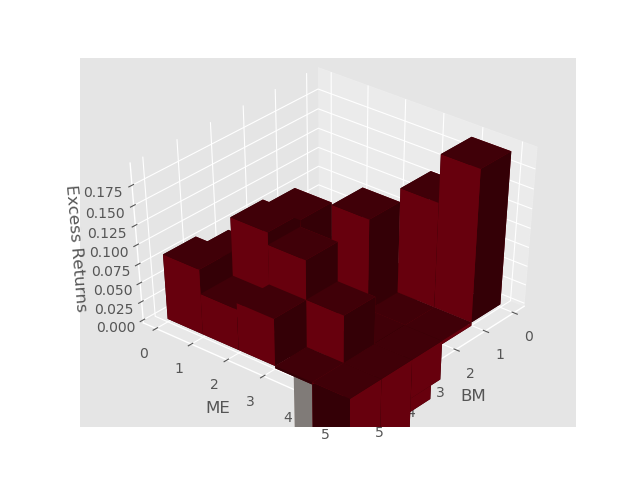

In [27]:
%matplotlib notebook
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.arange(5), np.arange(5))
BM, ME = xx.ravel(), yy.ravel()

dx = np.ones(len(BM))
dy = np.ones(len(ME))
dz = results_ex2.loc['Alpha'].values

#Create Colormap
cmap = cm.get_cmap('Reds') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 


ax1.bar3d(BM, ME, np.zeros(len(BM)), dx, dy, dz, color = rgba)

ax1.view_init(40,40)

ax1.set_xlabel('BM')
ax1.set_ylabel('ME')
ax1.set_zlabel('Excess Returns')

plt.show()

### Excercise 2.3

<IPython.core.display.Javascript object>


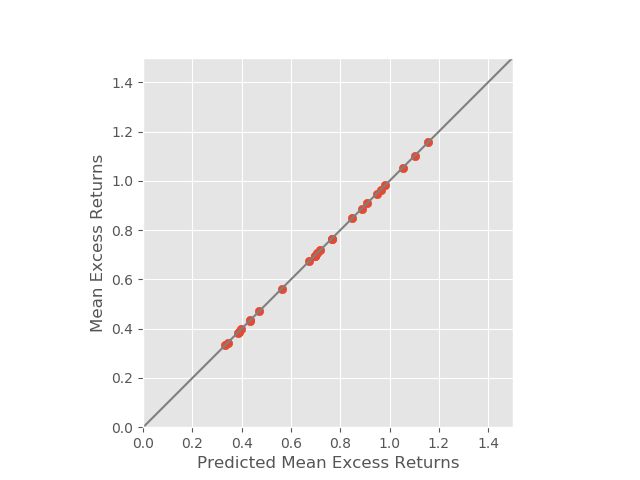

In [28]:
%matplotlib notebook
plt.scatter(results_ex2.loc['Pred. Ex. Ret (In Sample)'].values,mean_exreturns[:-4].values)
plt.plot(np.linspace(0,2), np.linspace(0,2), color = 'grey')

axes = plt.gca()
axes.set_xlim([0,1.5])
axes.set_ylim([0,1.5])
plt.gca().set_aspect('equal', adjustable = 'box')

chart_3 = plt.xlabel('Predicted Mean Excess Returns')
chart_3 = plt.ylabel('Mean Excess Returns')

plt.show()

### Excercise 2.4

In [25]:
#See Answer Sheet

### Excercise 2.5

<IPython.core.display.Javascript object>


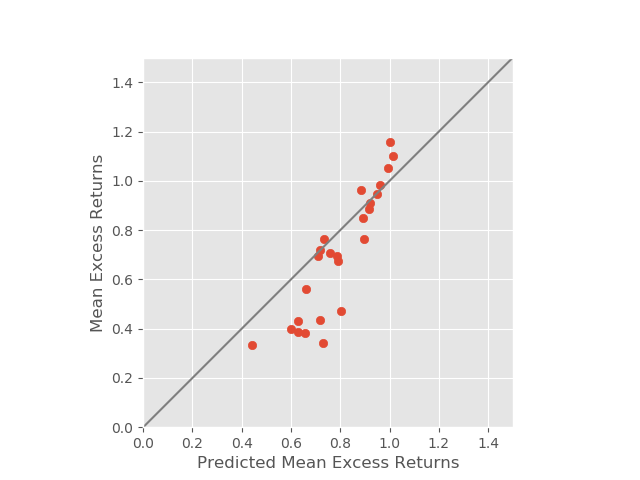

In [26]:
%matplotlib notebook
plt.scatter(results_ex2.loc['Pred. Ex. Ret (Out of Sample)'].values,mean_exreturns[:-4].values)
plt.plot(np.linspace(0,2), np.linspace(0,2), color = 'grey')

axes = plt.gca()
axes.set_xlim([0,1.5])
axes.set_ylim([0,1.5])
plt.gca().set_aspect('equal', adjustable = 'box')

chart_3 = plt.xlabel('Predicted Mean Excess Returns')
chart_3 = plt.ylabel('Mean Excess Returns')

plt.show()

The plot of Excercise 2.5 was done with 'In Sample' Data, it compares the model's predictions with the same data it was fitted on. It isn't therefore surprising that the plot exhibits a perfect line. 
<br>
If you use 'Out of Sample' data like in Ex. 2.5 , the plots deviate from the line. That isn't surprising 